# Predictive Analysis - Diamond Price Predict
Find the diamond profitable or not.

- What features more impact on diamond price?
- How much diamond price with some specific characteristic?

# Data Load

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
df_diamonds = pd.read_csv(url)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploratory Data Analysis EDA
- Variable type
- Varibale distribution
- Missing value
- Redundant feature(s)
- Feature correlation

## Variable Description


- Harga dalam dolar Amerika Serikat ($) adalah fitur target. 
- carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
- cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
- color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
- clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
- x: merepresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
- depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
- table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

In [57]:
df_diamonds.shape

(53940, 10)

In [58]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- 6 float type (carat, depth, table, x, y, z)
- 1 int type (price)
- 3 object type (cut, color, clarity)

In [59]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [60]:
df_diamonds.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## Fix Missing Value or 0

In [61]:
missing_values = (df_diamonds[['x', 'y', 'z']] == 0).sum()
missing_values

x     8
y     7
z    20
dtype: int64

In [62]:
df_diamonds_loc = df_diamonds.loc[(df_diamonds['x']==0) | (df_diamonds['y']==0) | (df_diamonds['z']==0)]
df_diamonds_loc.shape

(20, 10)

In [63]:
df_diamonds_loc

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


semua data x atau y yang 0 ada di z 0 juga

In [64]:
df_diamonds = df_diamonds.drop(df_diamonds_loc.index)
df_diamonds.shape

(53920, 10)

In [65]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


std not on 0

## Fix Outliers

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


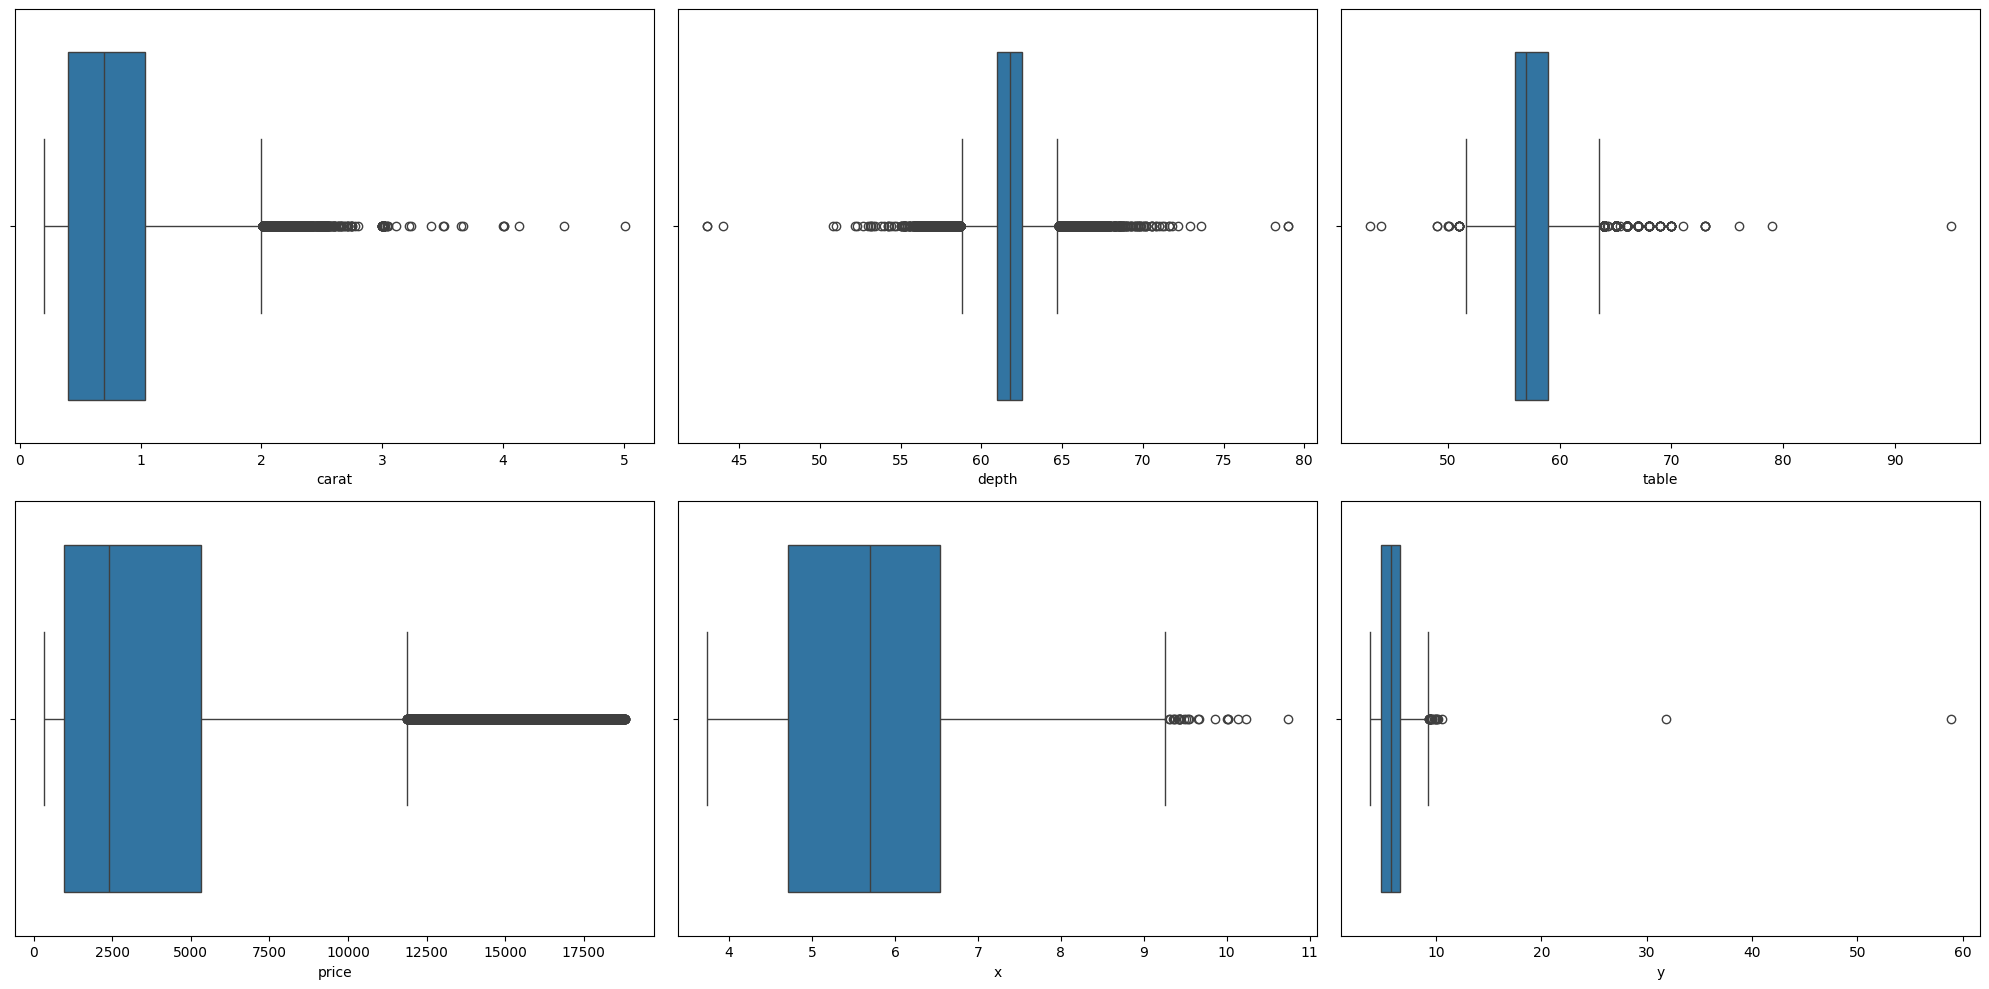

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# daftar fitur kecuali price
features = df_diamonds.columns.to_list()
categorical_features = ['cut','color','clarity']
target_feature = 'price'
numerical_features = [feature for feature in features if feature not in (categorical_features or target_feature)]
print(numerical_features)

# boxplot
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df_diamonds, ax=ax)

# atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


many outliers that should fix

In [67]:
# drop outlier menggunakan IQR
# hanya kolom numerik yang bisa dihitung IQR
q1 = df_diamonds[numerical_features].quantile(0.25) 
q3 = df_diamonds[numerical_features].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

df_diamonds = df_diamonds[~((df_diamonds[numerical_features] < batas_bawah) | (df_diamonds[numerical_features] > batas_atas)).any(axis=1)]
df_diamonds.shape


(47524, 10)

## Univariate Analysis

### Categorical Feature

In [68]:
# Function for analysis categoricak feature
def analysis_categorical_feature(df, feature, ax):
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    new_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(new_df)
    print(count.index[0])
    print(count.values)
    sns.barplot(x=count.index, y=count.values, ax=ax)
    # ax[iteration].count.plot(kind='bar', title=feature)

           jumlah sampel  persentase
cut                                 
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7
Ideal
[20340 12115 10994  3745   330]
       jumlah sampel  persentase
color                           
G              10081        21.2
E               8910        18.7
F               8466        17.8
H               7176        15.1
D               6195        13.0
I               4462         9.4
J               2234         4.7
G
[10081  8910  8466  7176  6195  4462  2234]
         jumlah sampel  persentase
clarity                           
SI1              11552        24.3
VS2              10928        23.0
SI2               7402        15.6
VS1               7373        15.5
VVS2              4683         9.9
VVS1              3463         7.3
IF                1650         3.5
I1                 473         1.0
SI1
[11552

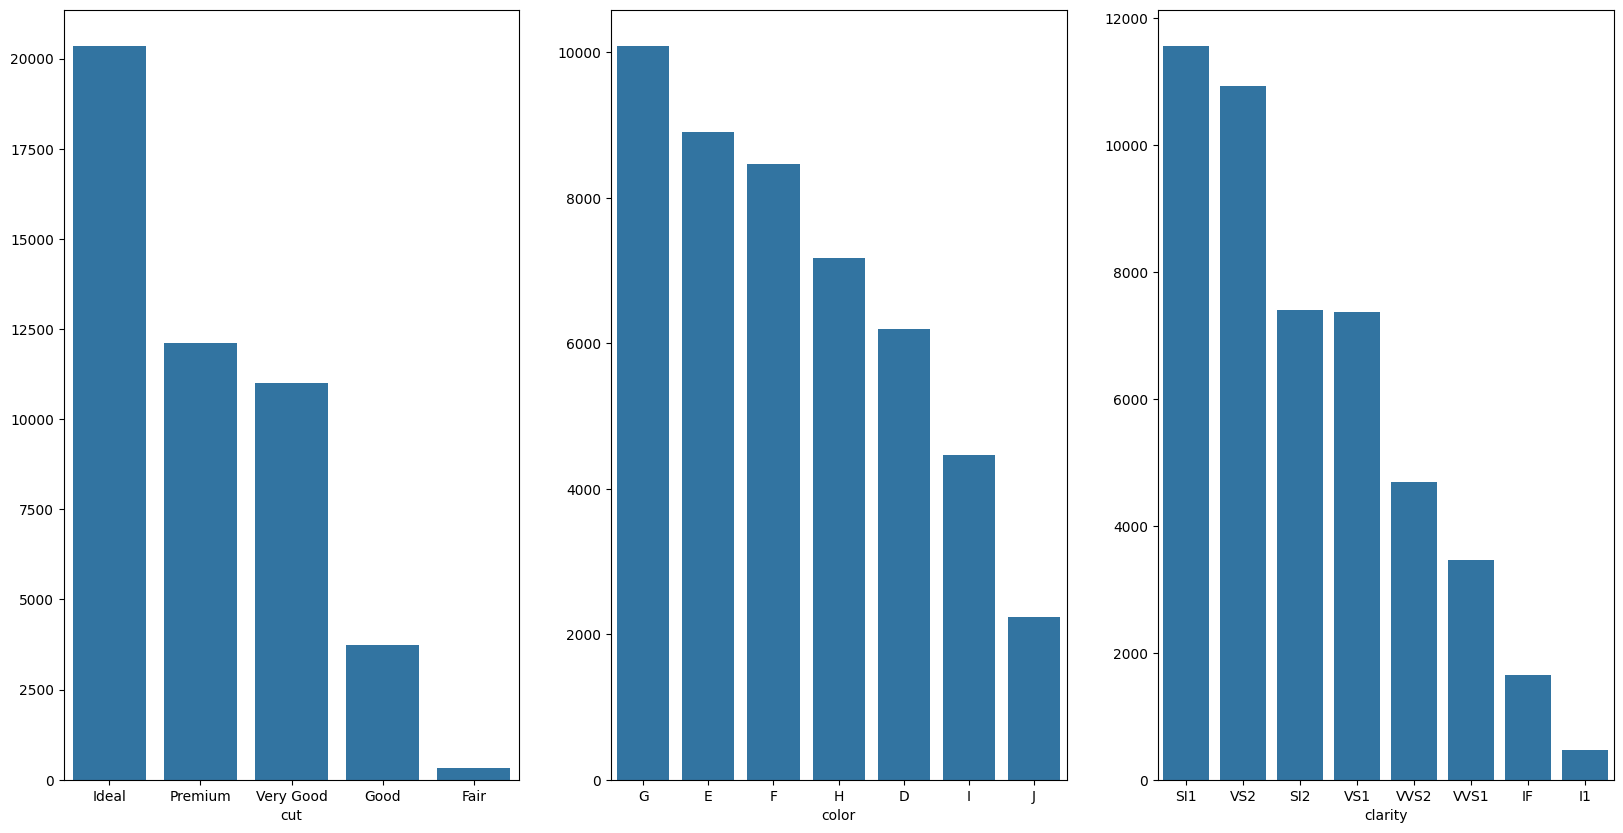

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, ax in enumerate(axes):
    analysis_categorical_feature(df_diamonds, categorical_features[i], ax)
plt.show()

### Numerical Features

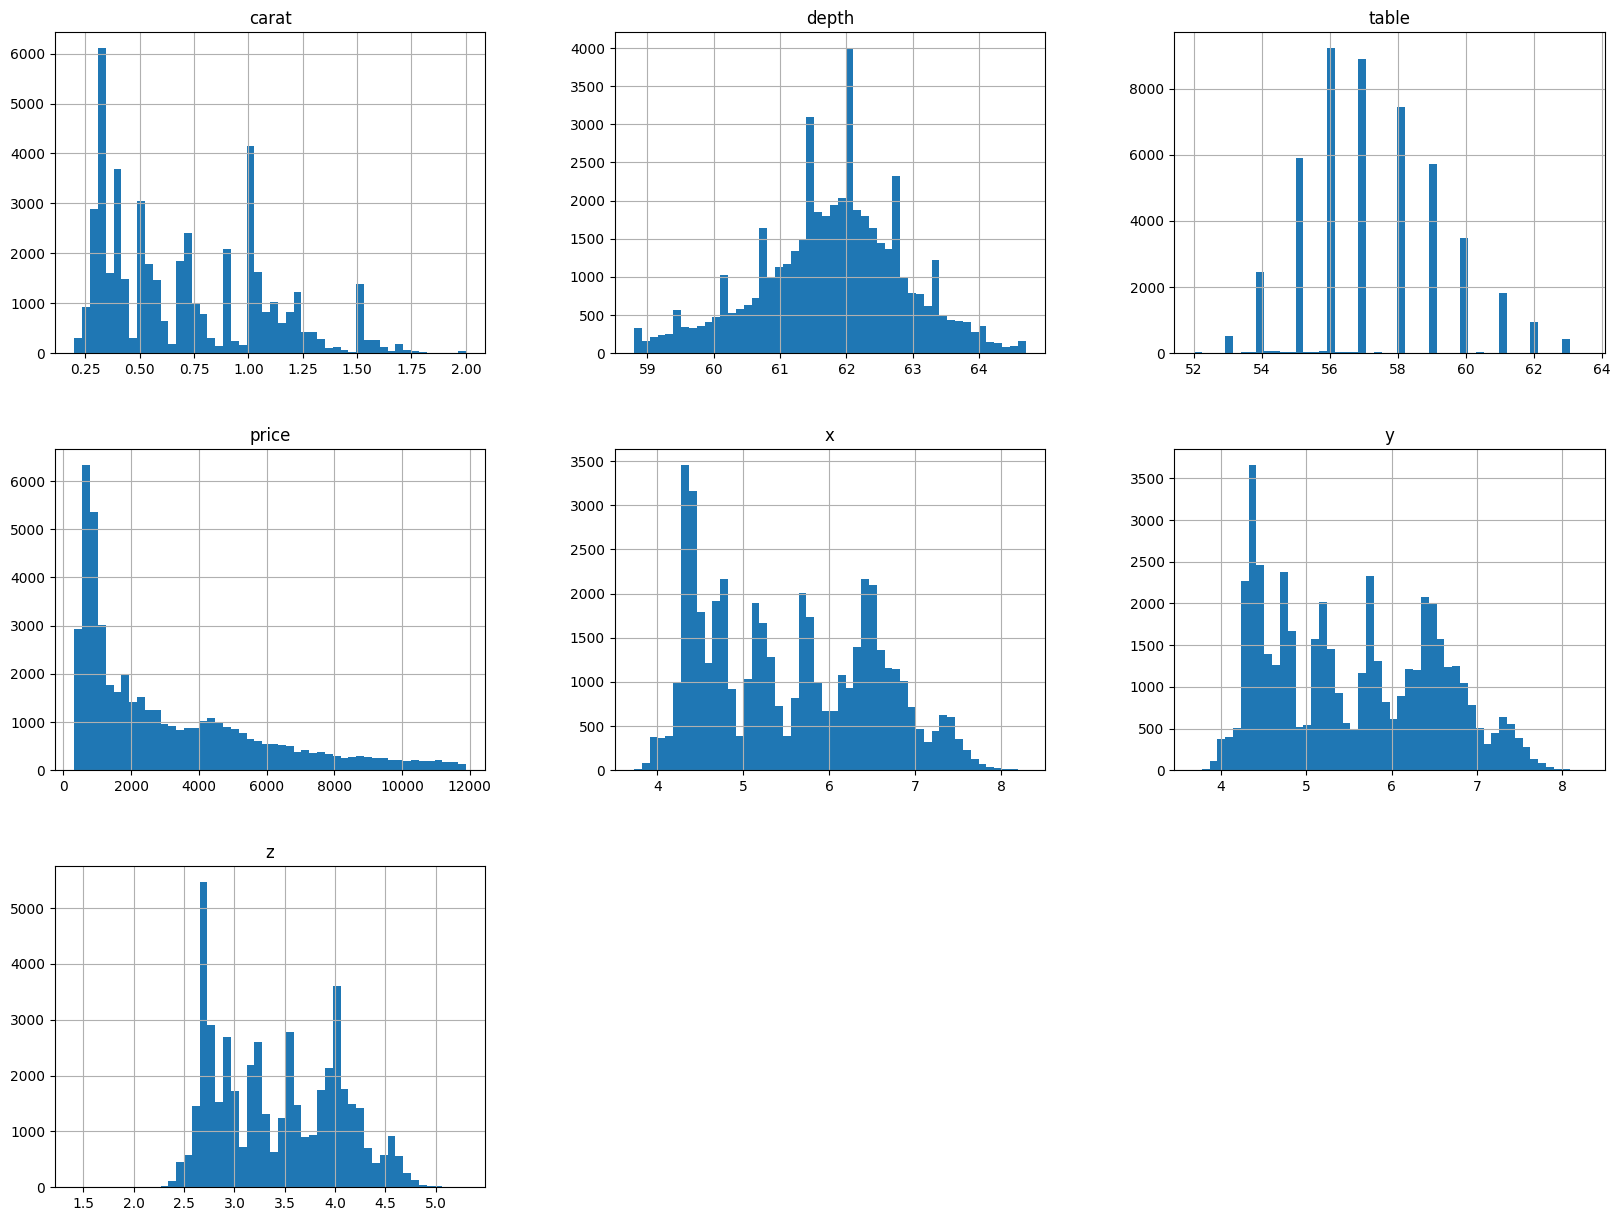

In [70]:
df_diamonds.hist(bins=50, figsize=(20,15))
plt.show()

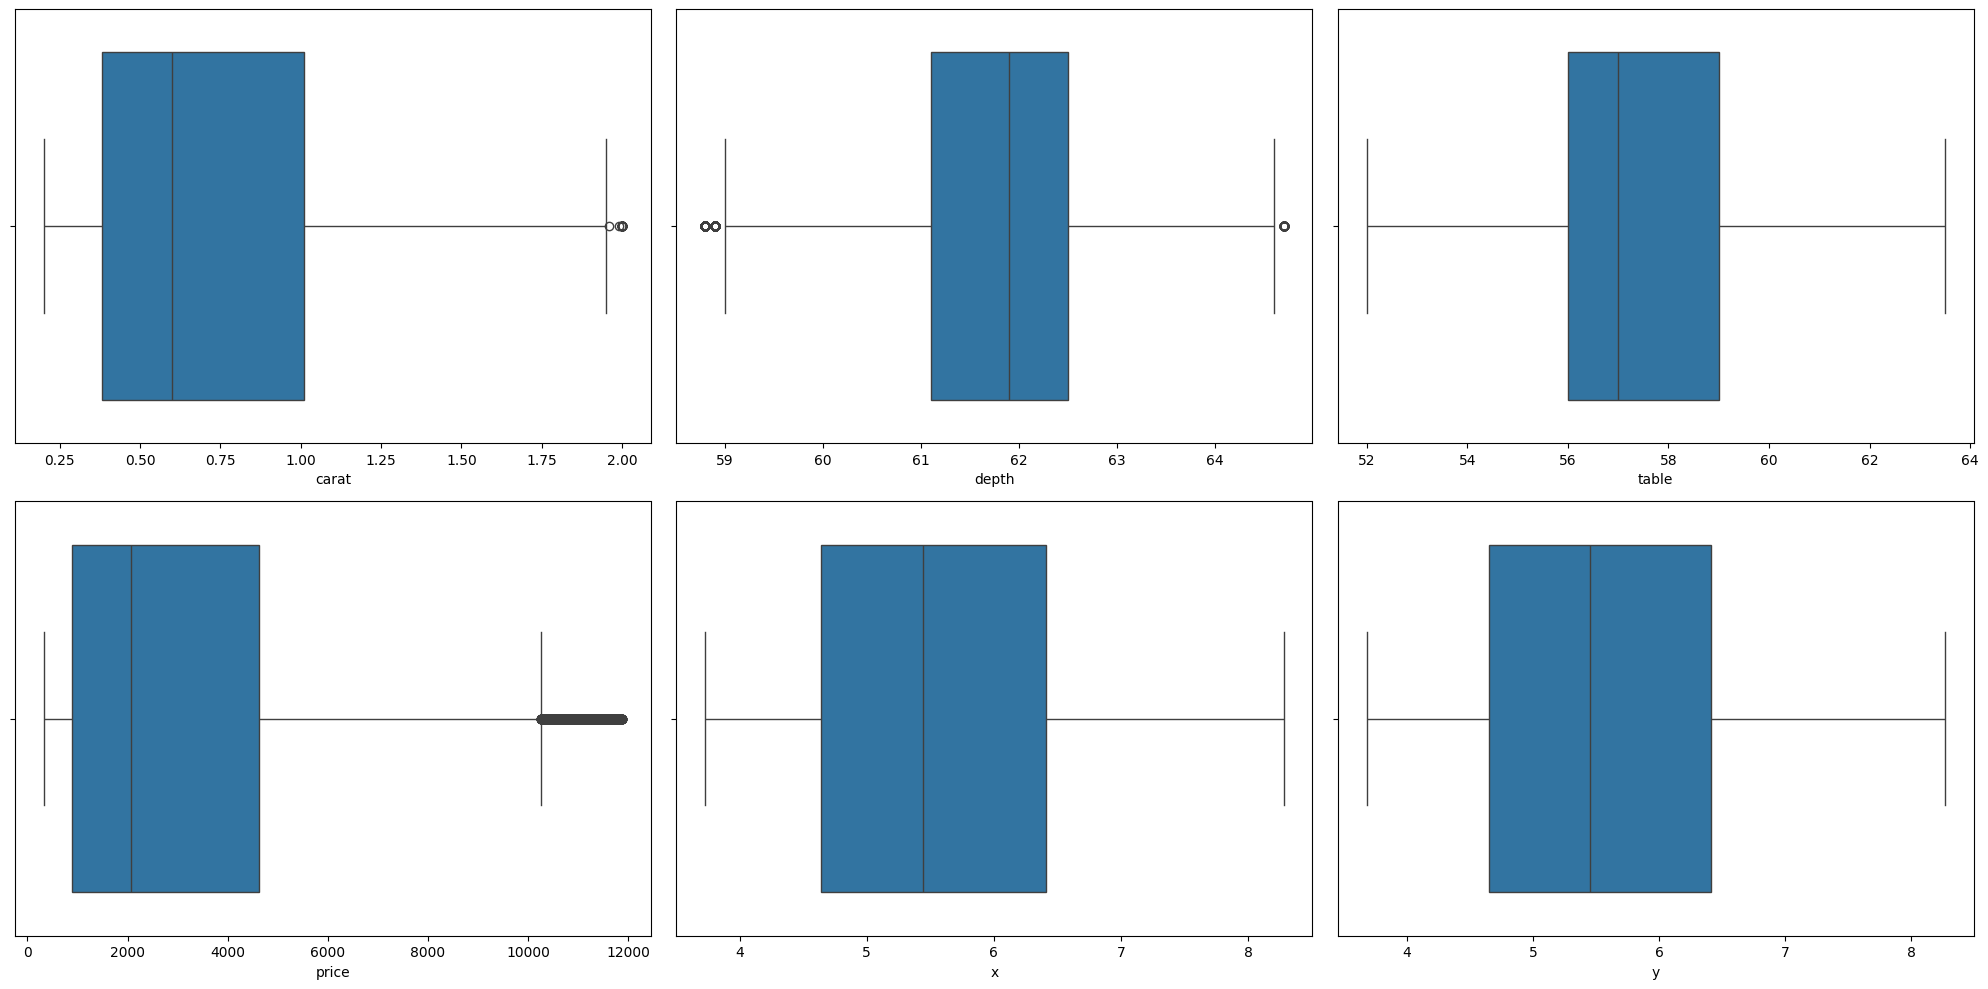

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# boxplot
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df_diamonds, ax=ax)

# atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Categorical Features

C:\Users\ubaid\AppData\Local\Temp\ipykernel_21692\3422040103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_diamonds, palette='viridis')
C:\Users\ubaid\AppData\Local\Temp\ipykernel_21692\3422040103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_diamonds, palette='viridis')
C:\Users\ubaid\AppData\Local\Temp\ipykernel_21692\3422040103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplo

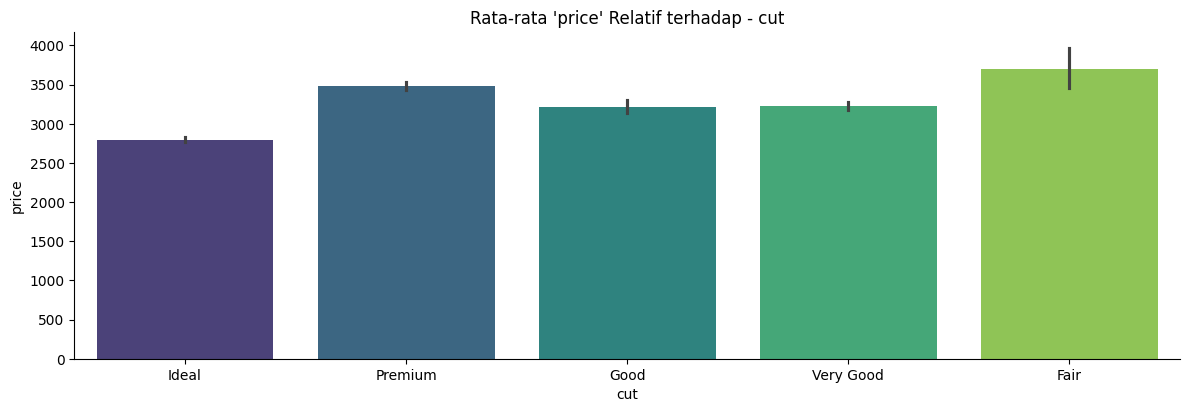

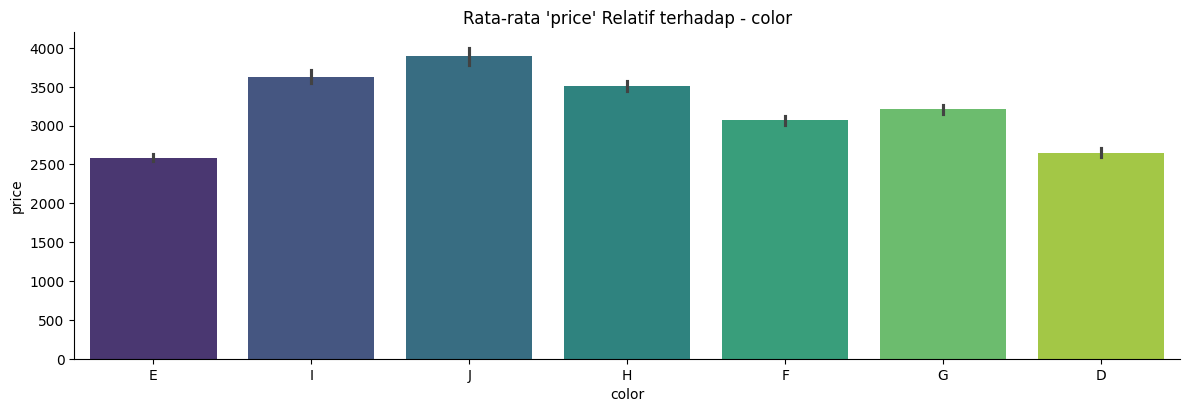

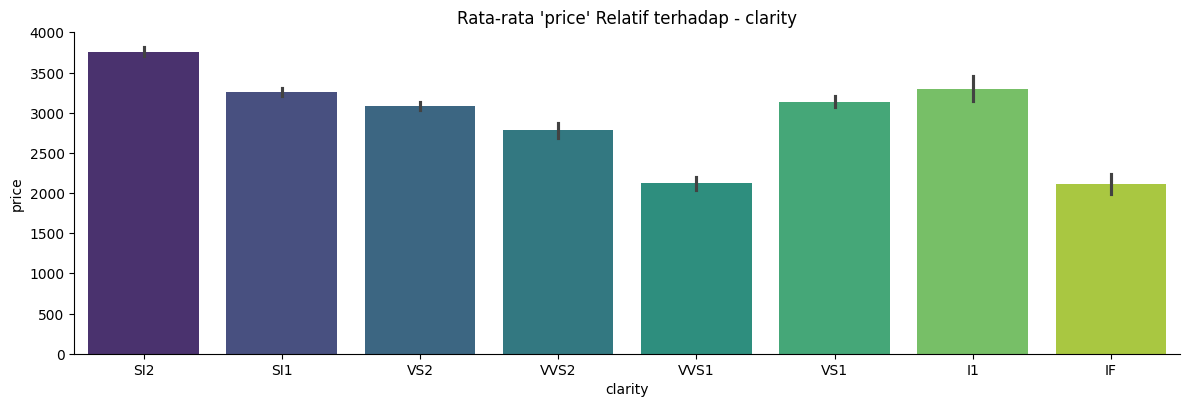

In [72]:
# Cek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

for col in categorical_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_diamonds, palette='viridis')
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

### Numerical Features

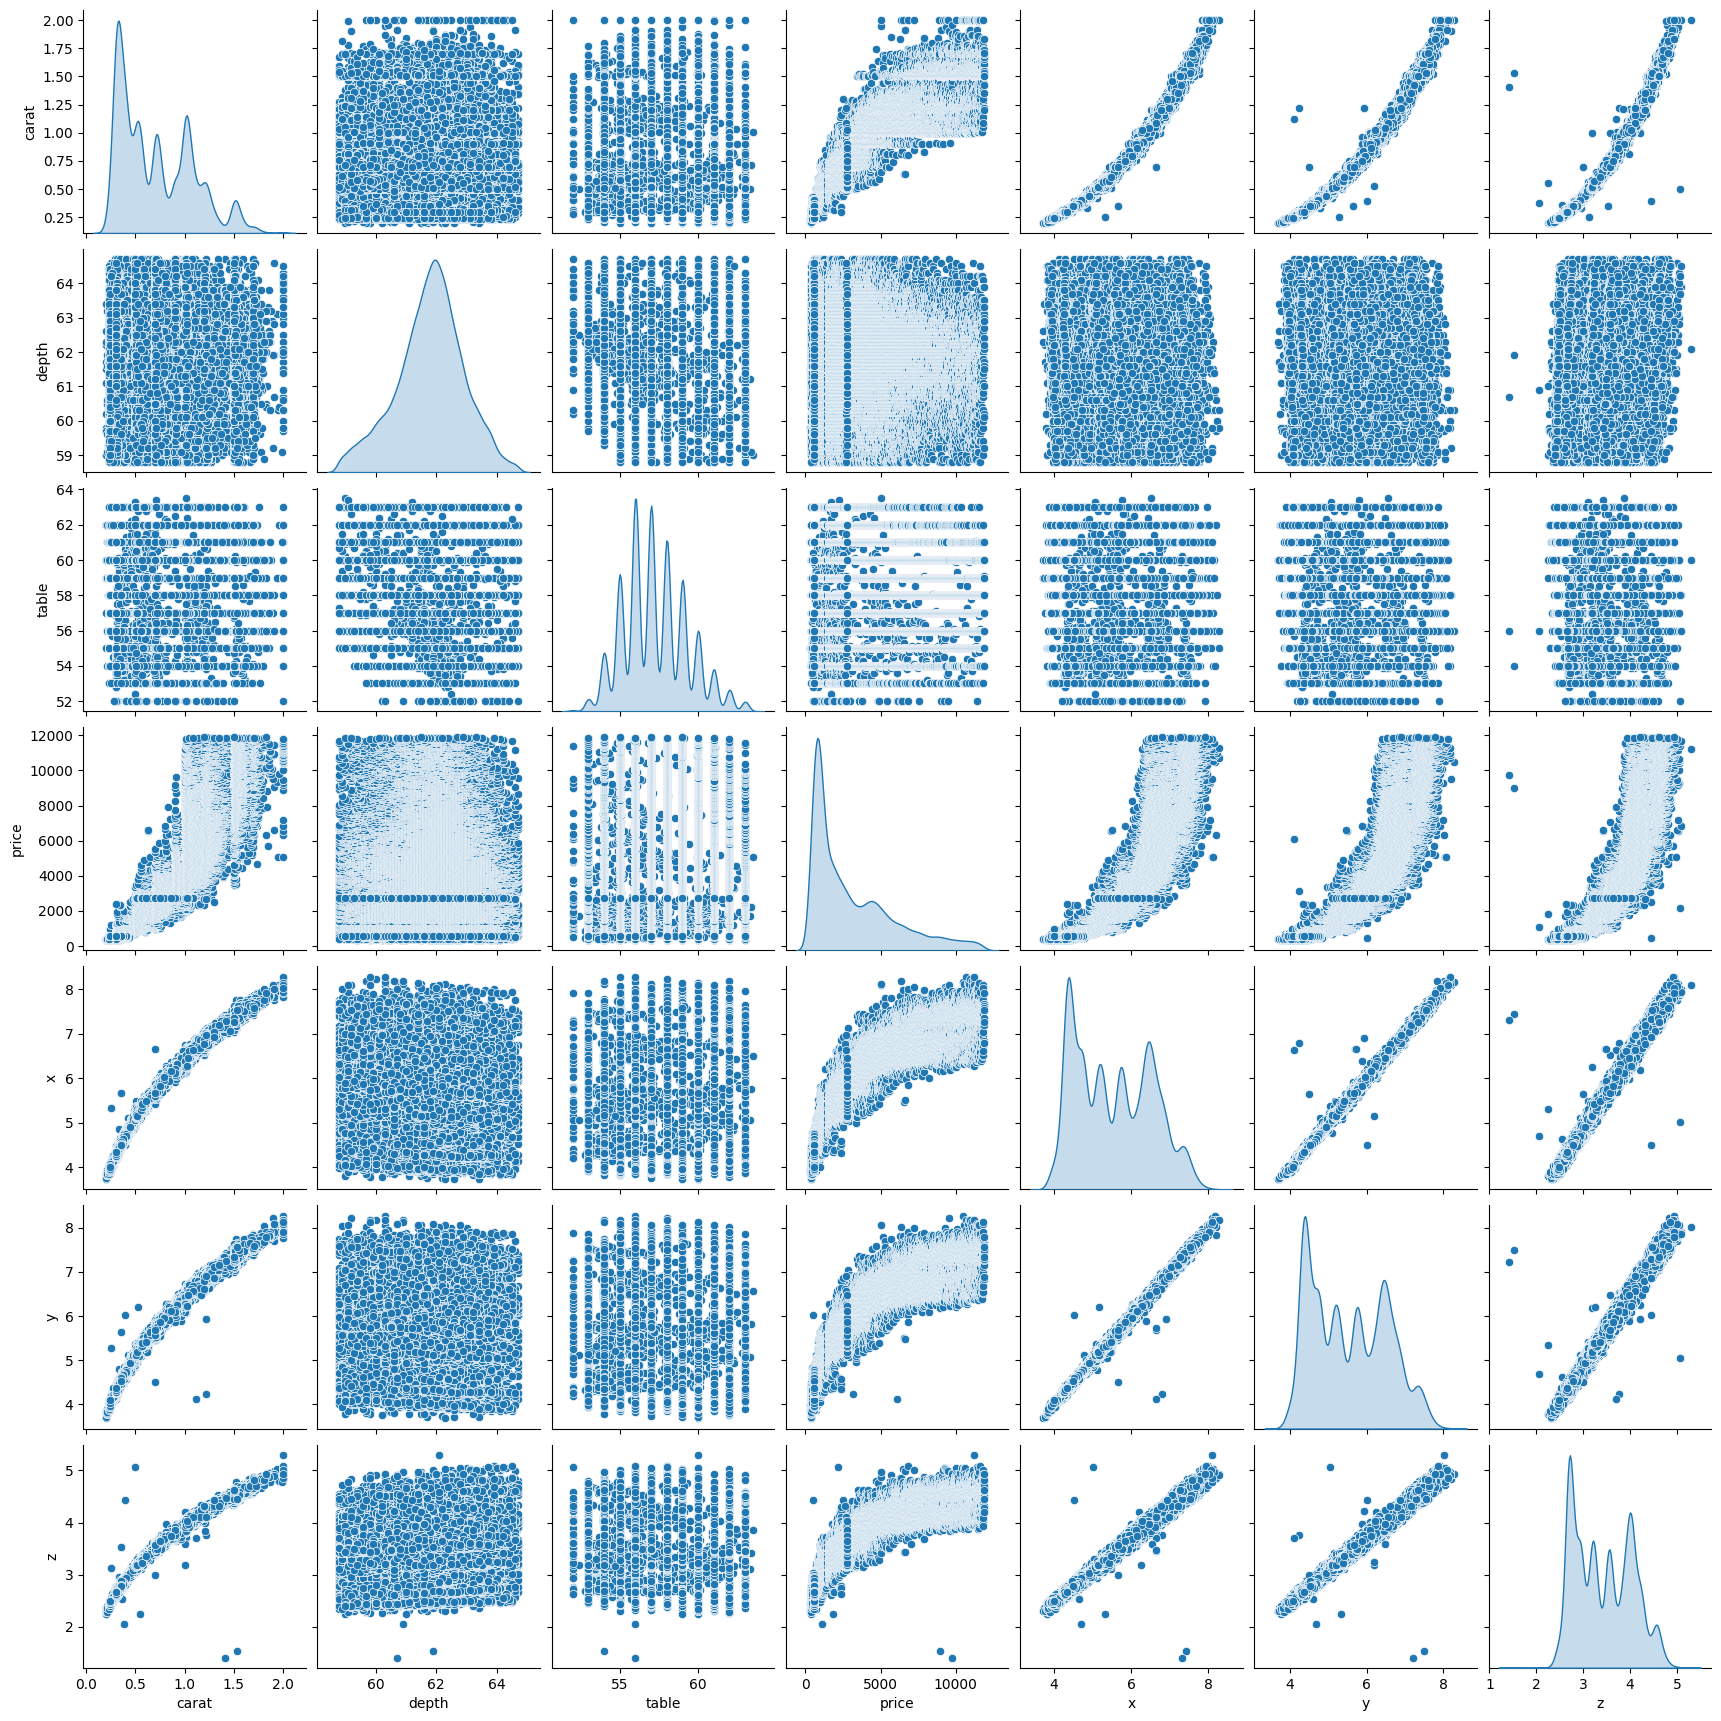

In [73]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_diamonds, diag_kind = 'kde')


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

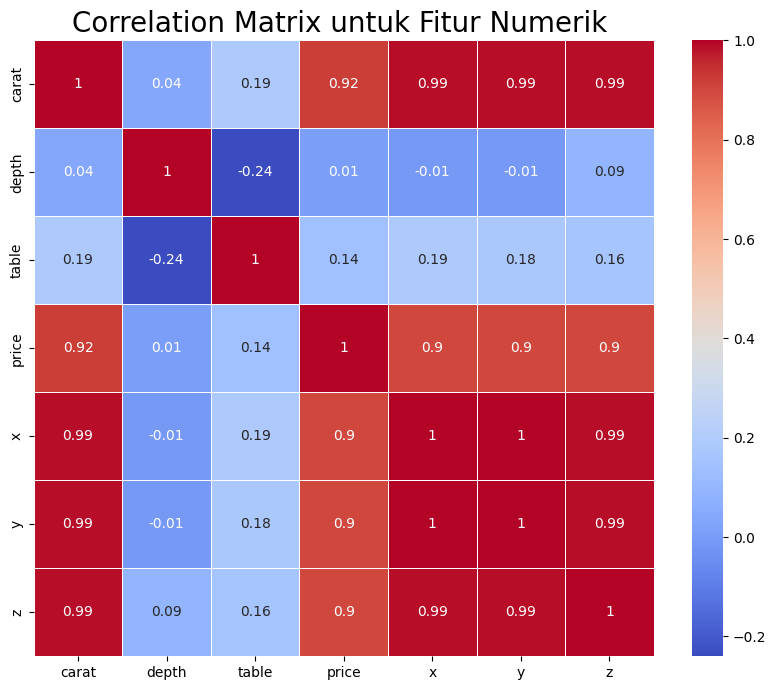

In [74]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_diamonds[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

x, y, z have highly correlation that means the features is redundant

In [75]:
df_diamonds.drop(['depth'], axis=1, inplace=True)

depth feature almost has not correlation with price (0.01), so we drop it

# Data Preparation

## OHE (One Hot Encoding) Categorical Features

In [76]:
from sklearn.preprocessing import  OneHotEncoder
df_diamonds = pd.concat([df_diamonds, pd.get_dummies(df_diamonds['cut'], prefix='cut')],axis=1)
df_diamonds = pd.concat([df_diamonds, pd.get_dummies(df_diamonds['color'], prefix='color')],axis=1)
df_diamonds = pd.concat([df_diamonds, pd.get_dummies(df_diamonds['clarity'], prefix='clarity')],axis=1)
df_diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
df_diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,61.0,326,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.29,58.0,334,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,58.0,335,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,57.0,336,3.94,3.96,2.48,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


## Dimension Reduction with PCA

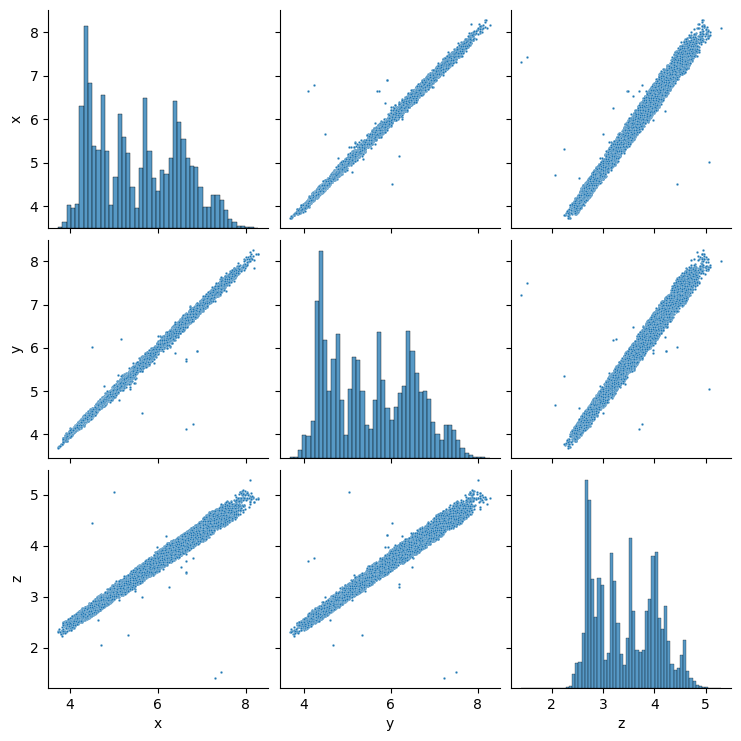

In [77]:
sns.pairplot(df_diamonds[['x','y','z']], plot_kws={"s": 3});

since x,y,z feature has similar correlation, we can group it with 1 PC

In [78]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(df_diamonds[['x','y','z']])
princ_comp = pca.transform(df_diamonds[['x','y','z']])

In [79]:
princ_comp

array([[-2.45258471, -0.01805597, -0.01052123],
       [-2.63006596, -0.06997942,  0.04782566],
       [-2.04852967,  0.02359652, -0.01266468],
       ...,
       [ 0.20939029,  0.05183578, -0.01258338],
       [ 0.8841492 , -0.04570632,  0.02327686],
       [ 0.47464307,  0.0228551 , -0.02676376]])

In [80]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

That means 99.8% information from x,y,z represented by 1st PC, 0.2% by 2nd PC, and 0.1% by 3rd PC

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df_diamonds[['x','y','z']])
df_diamonds['dimension'] = pca.transform(df_diamonds.loc[:, ('x','y','z')]).flatten()
df_diamonds.drop(['x','y','z'], axis=1, inplace=True)
df_diamonds.head()

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,-2.452585
1,0.21,61.0,326,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,-2.630066
3,0.29,58.0,334,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,-2.048530
4,0.31,58.0,335,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,-1.831975
5,0.24,57.0,336,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,-2.451982


In [82]:
df_diamonds.shape

(47524, 24)

## Split Train Test

In [83]:
from sklearn.model_selection import train_test_split
 
X = df_diamonds.drop(["price"],axis =1)
y = df_diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [84]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


## Standardisasion

In [85]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [86]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


means == 0 && std == 1

# Model Development

## KNN

In [87]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])
models

,KNN,RandomForest,Boosting
train_mse,NaN,NaN,NaN
test_mse,NaN,NaN,NaN


In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [89]:
models

,KNN,RandomForest,Boosting,knn
train_mse,NaN,NaN,NaN,203766.03048
test_mse,NaN,NaN,NaN,NaN


In [90]:
# Testing Performance between K=1 to K=10
mse_values = []

for k in range(1, 11):
    #initiate KNN Regressor
    knn = KNeighborsRegressor(n_neighbors=k)

    #fit the model
    knn.fit(X_train, y_train)

    #predict the model
    y_pred = knn.predict(X_test)

    #calculate the mse
    mse = mean_squared_error(y_pred = y_pred, y_true=y_test)

    #append the mse to mse_values
    mse_values.append(mse)

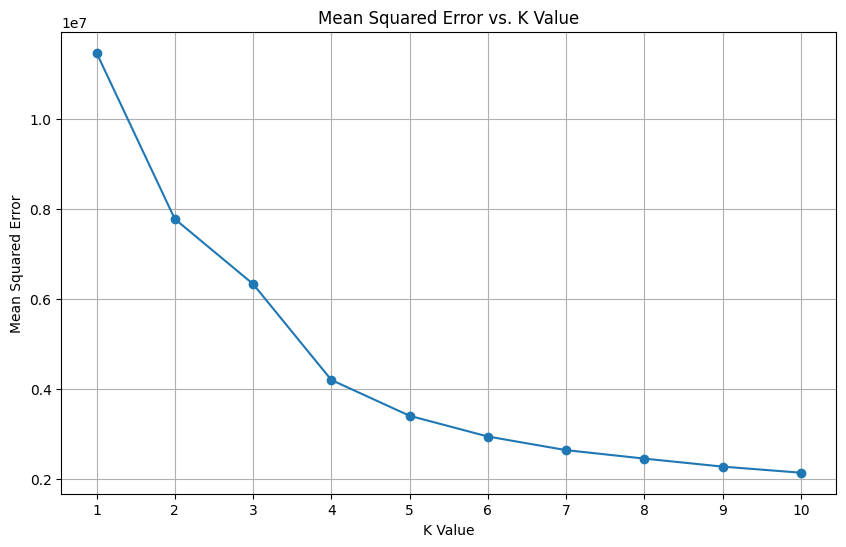

In [91]:
# Visualisasikan MSE untuk setiap nilai K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

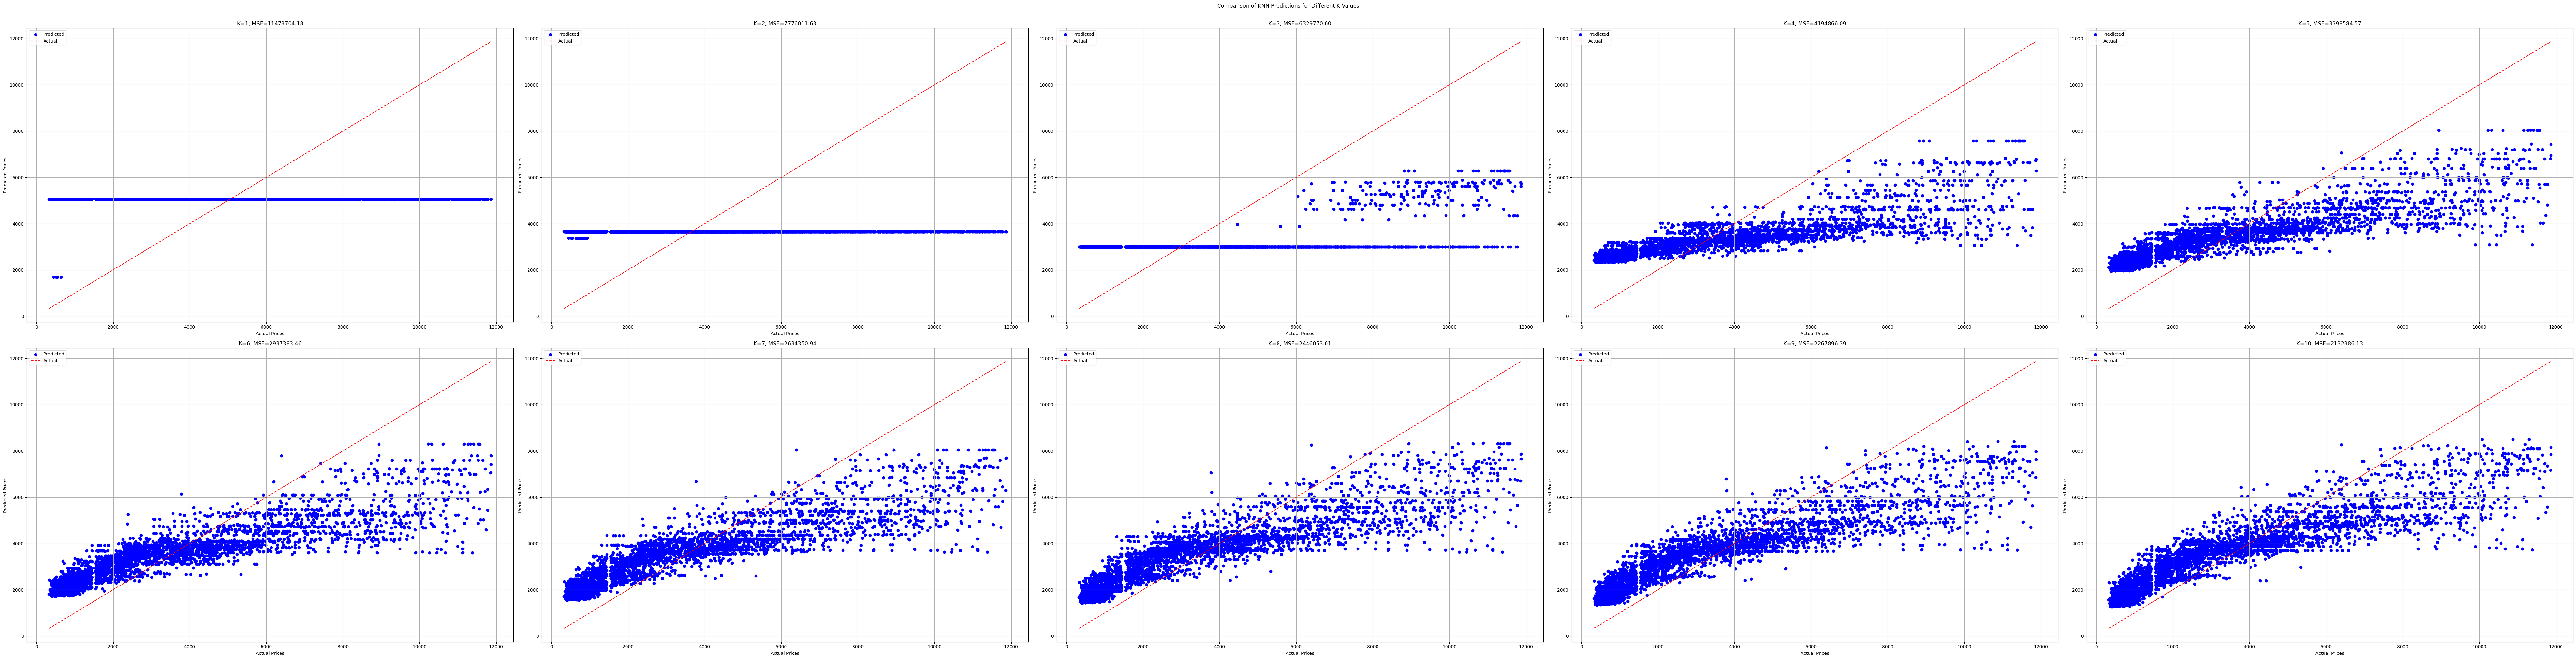

In [92]:
fig, axes = plt.subplots(2, 5, figsize=(80, 20))
axes = axes.ravel()

for k in range(1, 11):
    # Inisialisasi KNeighborsRegressor dengan nilai K saat ini
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fitting model dengan data training
    knn.fit(X_train, y_train)
    
    # Prediksi harga dengan data testing
    y_pred = knn.predict(X_test)
    
    # Hitung MSE untuk prediksi saat ini
    mse = mean_squared_error(y_test, y_pred)
    
    # Plot prediksi vs harga asli
    axes[k-1].scatter(y_test, y_pred, color='blue', label='Predicted')
    axes[k-1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
    axes[k-1].set_title(f'K={k}, MSE={mse:.2f}')
    axes[k-1].set_xlabel('Actual Prices')
    axes[k-1].set_ylabel('Predicted Prices')
    axes[k-1].legend()
    axes[k-1].grid(True)

plt.tight_layout()
plt.suptitle('Comparison of KNN Predictions for Different K Values', y=1.02)
plt.show()

## Random Forest

In [93]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

- n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan. 
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

In [94]:
models

,KNN,RandomForest,Boosting,knn
train_mse,NaN,52287.365706,NaN,203766.03048
test_mse,NaN,NaN,NaN,NaN


MSE: 1307023.167946651


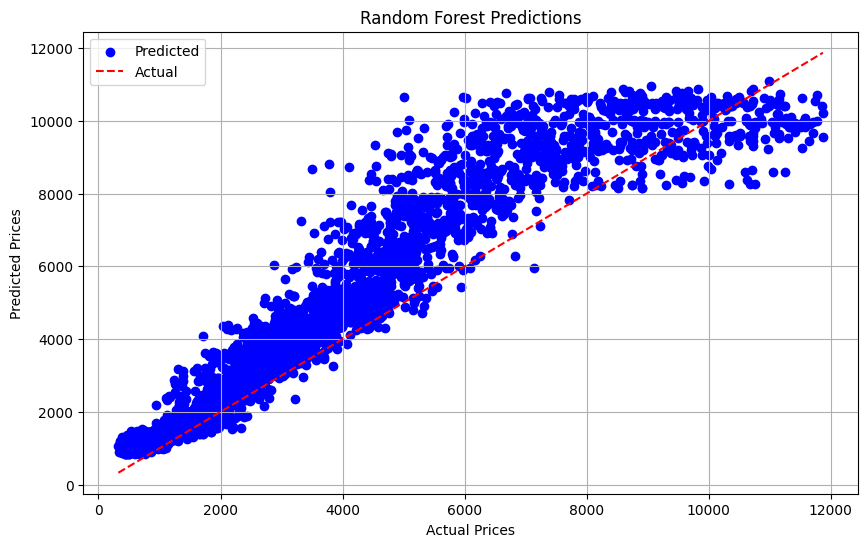

In [95]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi harga dengan data testing
y_pred = rf.predict(X_test)

# Hitung MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Visualisasikan hasil prediksi versus harga asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Random Forest Predictions')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Boosting


In [96]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [97]:
models

,KNN,RandomForest,Boosting,knn
train_mse,NaN,52287.365706,904838.012908,203766.03048
test_mse,NaN,NaN,NaN,NaN


# Testing

In [98]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [99]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,203.76603,239.54541
RF,52.287366,130.788418
Boosting,904.838013,846.212966


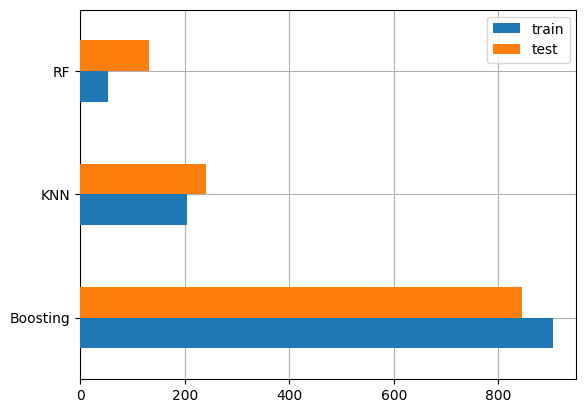

In [100]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [101]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,923.2,884.2,788.1
